# Project 6 - Create a counterfeit banknote detection algorithm based on Logistic Regression
# Part 2 - Dimensionnality Reduction with PCA

In the Exploratory Data Analysis (EDA), we have seen that some features might be correlated to one another. A robust model is a simple model, which means that we want to keep only the necessary information by removing redundancy. For that purpose, we will perform a principal component analysis (PCA). The PCA is used to reduce the dimension of the features available by creating composite variables orthogonal to each other (i.e., independent and not correlated). 

This part include all the following steps:

    ✅ Scree Plot Analysis
    ✅ Loading Plots
    ✅ Score Plots
    ✅ Quality Analysis of the PCA and contributions of each variables
    ✅ Selection of the best component variables

## Part 3 -  Classification

We have selected our 3 principal components, we can now move on to the next and final part, which consists of creating a predictive model to detect the fake banknotes. We will start this work by clustering the data with Kmean to get a better understanding of how the data are structured. The clusters generated can also be used as features to improve the classification model.

The problem we want to solve is a binary classification. The dataset is labeled so this is a supervised problem. 
The size of the dataset is relatively small and the main focus is to be accurate (Remember: we want to detect fake banknotes).
Therefore, Logistic Regression is especially indicated for this case-study. 

This part include all the following steps:

    ✅ Explore patterns and structure with Kmean clustering
    ✅ Create a predictive model based on Logistic Regression 

## Get started

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path

import matplotlib.pyplot as plt
from matplotlib.cbook import boxplot_stats  
import seaborn as sns
%matplotlib inline

from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [2]:
# Dataset with outliers
df1 = pd.read_csv(Path.cwd()/'dataset.csv',index_col=0)
df1.head()

,is_genuine,height_left,height_right,margin_low,margin_up,length
0,True,104.86,104.95,4.52,2.89,112.83
1,True,103.74,103.70,4.01,2.87,113.29
2,True,103.76,103.76,4.40,2.88,113.84
3,True,103.78,103.65,3.73,3.12,113.63
4,True,103.70,103.75,5.04,2.27,113.55


In [3]:
# Dataset without outliers
df2 = pd.read_csv(Path.cwd()/'dataset_cleaned.csv',index_col=0)
df2.head()

,is_genuine,height_left,height_right,margin_low,margin_up,length
1,True,103.74,103.70,4.01,2.87,113.29
2,True,103.76,103.76,4.40,2.88,113.84
3,True,103.78,103.65,3.73,3.12,113.63
5,True,104.65,104.44,4.54,2.99,113.16
6,True,103.55,103.80,3.97,2.90,113.30


## Pre-processing

All the datasets' variables are expressed in the same units: millimeters. Nonetheless, scaling the variables is essential before applying the PCA because the range varies slightly between the features.

For example:
- Margin range between 0.2 and 6
- Height_left range between 103 and 104

As a result, even if all units are expressed in the same units, the margins features might weigh less in the model than the others. 
Data standardization procedures equalize the range and smooth the variability.

In [4]:
# Standardization Function
def standard(df, idxcol):
    df_std = df.copy()
    df_std = df_std.set_index(idxcol) #Here we put the label column in index
    mask = df_std.columns
    df_std[mask] = StandardScaler().fit_transform(df_std[mask])

    return df_std

In [5]:
X_scaled1 = standard(df1,'is_genuine').reset_index() #with outliers
X_scaled2 = standard(df2,'is_genuine').reset_index() #without outliers

In [6]:
# Extract features, values and target for both dataset
features1 = X_scaled1.iloc[:,1:].columns
y1 =  X_scaled1['is_genuine'].values #labels

features2 = X_scaled2.iloc[:,1:].columns
y2 =  X_scaled2['is_genuine'].values

## PCA

In [7]:
# Apply the algorithm 
pca = PCA()
name = ['PC1','PC2','PC3','PC4','PC5']
X_PCA1 = X_scaled1[['is_genuine']].copy()
X_PCA1[name] = pd.DataFrame(pca.fit_transform(X_scaled1.iloc[:,1:].values),columns=[name])

In [8]:
# How does it look?
X_PCA1

,is_genuine,PC1,PC2,PC3,PC4,PC5
0,True,2.143117,2.982124,-1.947397,0.221265,-0.948574
1,True,-2.051636,0.411908,0.249463,-0.029359,-0.463753
2,True,-1.953085,0.808068,0.247236,-0.544796,0.059205
3,True,-2.035150,-0.359593,-0.537573,-0.181211,0.010054
4,True,-2.432789,2.792122,1.962433,-0.133434,-0.572201
...,...,...,...,...,...,...
165,False,2.446896,-0.674246,-0.431651,-0.856112,-0.057301
166,False,2.325927,0.918780,0.215759,1.189956,-0.777448
167,False,1.952634,-0.726513,0.423268,0.752789,-0.682224
168,False,0.783931,-1.616425,0.054200,-0.255277,0.176046


### Scree plots

Remember that the main idea behind PCA is that most of the variance hold in high-dimensional data can be captured in a lower-dimensional subset composed by few principal components. 
Reducing the dimension is therefore based on choosing the right number of principal components to retain.  

A scree plot displays how much variance each principal components (PCs) captures from the data. It is a good visualization to check wether or not the PCA worked well. Ideally, the 1st component will capture the most variance, then the second one, and so on. 
The y axis is eigenvalues, which essentially stand for the amount of variance explained. 

- We can use this plot to select which PCs to keep according to the percentage of variance explained

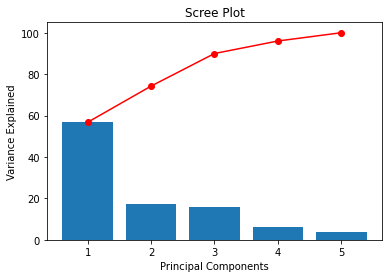

In [9]:
# Create visual
scree = pca.explained_variance_ratio_*100
plt.bar(np.arange(len(scree))+1, scree)
plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
plt.xlabel("Principal Components")
plt.ylabel("Variance Explained")
plt.title("Scree Plot")
plt.show(block=False)

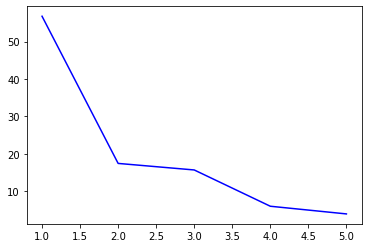

In [10]:
# Focus on the elbow
plt.plot(np.arange(len(scree))+1, scree,c="blue")
plt.show()

In [11]:
# Get eigenvalues for each components
print(pca.explained_variance_ratio_)

[0.56747118 0.1747554  0.15729369 0.06048131 0.03999841]


The first two components capture about 74% of the variance which is pretty low.
To select the number of PC to keep, in that case, we could use these rules of thumbs:

- Pick PCs with eigenvalues of at least 10%.
- The selected PCs should be able to describe at least 82% of the variance.
    
Based on the scree plot, we decide to keep the first 3 components as they capture about 90% of the variance which is good. 
    
Sources: 
- https://blog.bioturing.com/2018/06/18/how-to-read-pca-biplots-and-scree-plots/
- https://stats.stackexchange.com/questions/223450/t-sne-versus-mds

In [12]:
# Apply the algorithm on the cleaned dataset
pca2 = PCA()
X_PCA2 = X_scaled2.copy()
X_PCA2[features2] = pca2.fit_transform(X_PCA2.iloc[:,1:].values) #with outliers

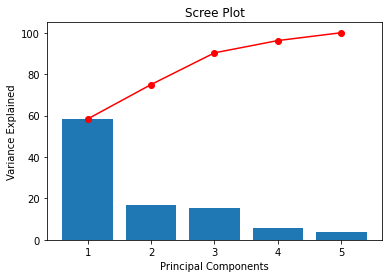

In [13]:
# Create visual
scree = pca2.explained_variance_ratio_*100
plt.bar(np.arange(len(scree))+1, scree)
plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
plt.xlabel("Principal Components")
plt.ylabel("Variance Explained")
plt.title("Scree Plot")
plt.show(block=False)

In [14]:
# Get eigenvalues for each components
print(pca2.explained_variance_ratio_)

[0.58347795 0.16618309 0.15316934 0.05928117 0.03788846]


Similarly, we can see that we need to keep the first 3 PCs to hit 90% of the variance explained on the dataset without outliers.
Cleaning the dataset had almost no impact on this step. We could reasonably expect that as we remove a very small number of outliers. 
At this stage, we could decide to work only on the cleaned dataset but for the purpose of learning the good practices we are keeping the 2 datasets.


### Loadings Plots

The loadings can be understood as the weights for each original features when calculating the principal component. Hence. the loadings plot shows the influence of each features in a principal component. 

In [15]:
# Function to display the loading plots
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: 
        if d2 < n_comp:

            fig, ax = plt.subplots(figsize=(7,6))

            # Settings Plot Limits
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # Display Arrows
            plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),pcs[d1,:], pcs[d2,:], angles='xy', scale_units='xy', scale=1, color="grey")
                #(https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            
            # Labelling variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='9', ha='center', va='center', rotation=label_rotation, color="black", alpha=0.5)
            
            # Display circles
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # Display horizontal & vertical lines
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # Labelling axis
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))
            
            # Labelling plot
            plt.title("Loading Plot (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)        

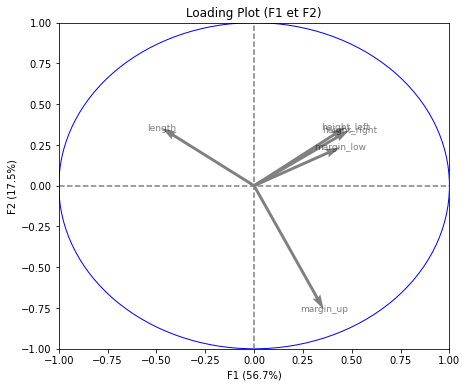

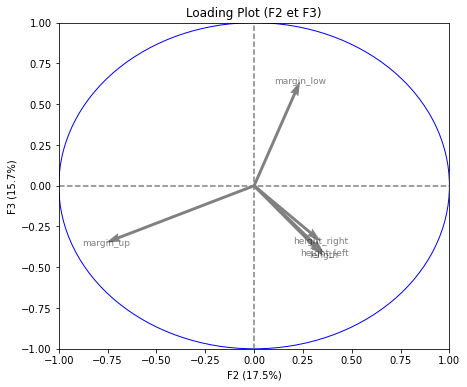

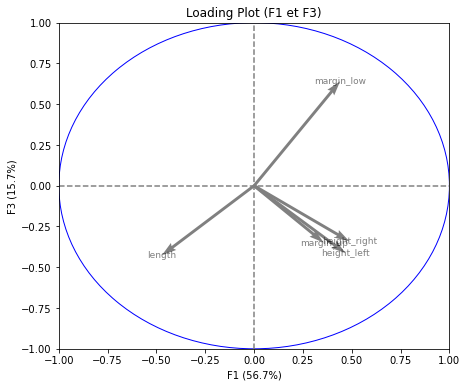

In [16]:
# Create Loadings Plots
pcs = pca.components_
display_circles(pcs, 6, pca, [(0,1),(1,2),(0,2)], labels = np.array(features1))

- All features seem to equally weigh on the plan F1. Length is the only original feature that is negatively correlated to this plan.
- Margin_up seems to weigh more on the plan F2 than the others. It's also the only one negatively correlated to this plan.
- Margin_low seems to weigh more on the plan F3 than the others. It's also the only one positively correlated to this plan.

We can also encompass some of the observations made within the EDA about how the variables are correlated to each other. 
    
- On F2 plan: 
    - height_left and height_right are strongly correlated to each other: the two vectors are close in each plans.
    - they are also highly correlated to margin_low
- On the F3 plan:
    - height_left and height_right are strongly correlated to each other: the two vectors are close in each plans.
    - they are also highly correlated to length.
    

In [17]:
# Let's interpret the 3 PCs of the cleaned dataset in another way

# dataset without outliers
F1 = pca2.components_[0]
F2 = pca2.components_[1]
F3 = pca2.components_[2]

pd.DataFrame({'F1':F1,'F2':F2,'F3':F3}, np.array(features2))

,F1,F2,F3
height_left,0.467595,-0.313975,-0.444069
height_right,0.487418,-0.293806,-0.377743
margin_low,0.441344,-0.311243,0.593046
margin_up,0.362716,0.792601,-0.267309
length,-0.466296,-0.300015,-0.486780


All previous observations are similarly visible on the cleaned dataset. 

### Scores plots

The score plots indicate the projection of the data onto the span of the principal components. 
As in the previous section, this 3-dimensional set results in 3 score plots, one for each pairwise combination of PCs. 
We are using the field is_genuine (fake/genuine) as a label for our data to see if we can detect a pattern in the 3 different combination of PCs

Tips: If the first two components account for most of the variance in the data, you can use the score plot to assess the data structure and detect clusters, outliers, and trends. Groupings of data on the plot may indicate two or more separate distributions in the data. If the data follow a normal distribution and no outliers are present, the points are randomly distributed around zero.

References: https://support.minitab.com/en-us/minitab/18/help-and-how-to/modeling-statistics/multivariate/how-to/principal-components/interpret-the-results/all-statistics-and-graphs/

In [18]:
def display_score_plot(df, n_comp, pca, axis_ranks,labels=None, alpha=1,marker=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
    
            fig, ax = plt.subplots(figsize=(15,9))
        
            # Plot
            ax.scatter(x=df[:, d1], y=df[:, d2],alpha=alpha, marker=marker,c=labels,cmap='coolwarm') 
            
            # Labels
            for i,(x,y) in enumerate(df[:,[d1,d2]]):
                plt.text(x, y, labels[i],fontsize='8', ha='center',va='top', color='black')

            
            # axis names with %explained variance
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))
        
            # Lines
            plt.plot([-3, 3], [0, 0], color='grey', linewidth= 0.7,ls='--')
            plt.plot([0, 0], [-3, 3], color='grey', linewidth= 0.7,ls='--')

            # Title
            plt.title("Score Plots on (F{} & F{})".format(d1+1, d2+1))
            plt.show(block=False)

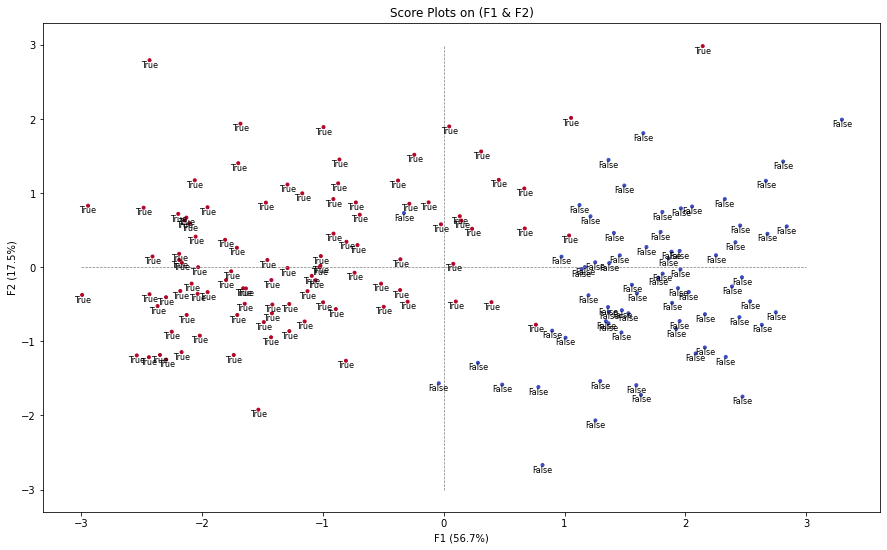

In [19]:
# Creating the score plots for the dataset with outliers: F1 vs F2
display_score_plot(X_PCA1.iloc[:,1:].values, 3, pca, [(0,1)], labels=y1, marker='.')

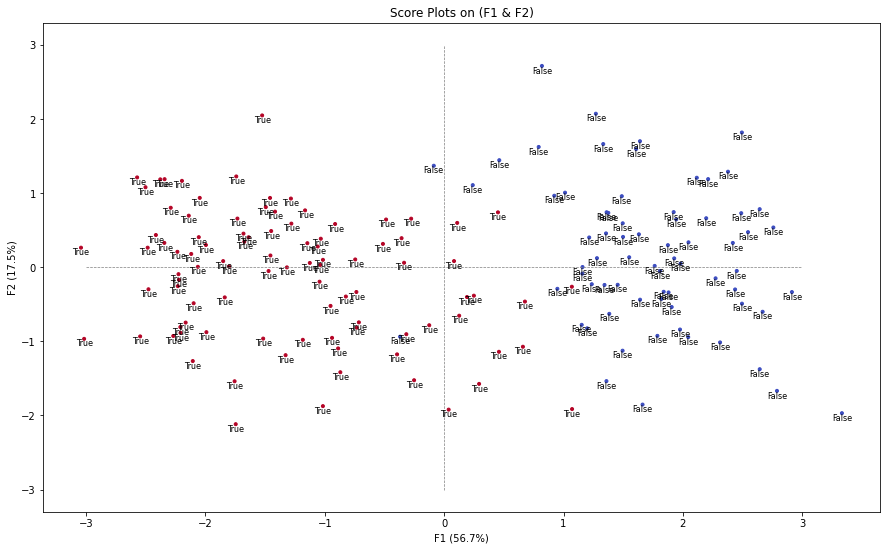

In [20]:
# Creating the score plots for the dataset without outliers: F1 vs F2
display_score_plot(X_PCA2.iloc[:,1:].values, 3, pca, [(0,1)], labels=y2, marker='.')

The separation between the 2 groups of banknotes is very clean and clear on the plan F1, which makes this components interesting for our model.

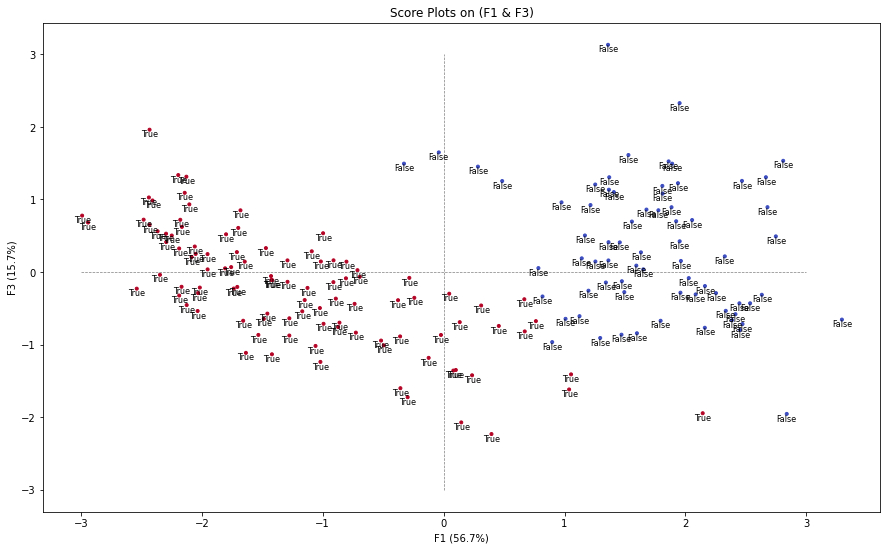

In [21]:
# Creating the score plots for the dataset with outliers: F1 vs F3
display_score_plot(X_PCA1.iloc[:,1:].values, 3, pca, [(0,2)], labels=y1, marker='.')

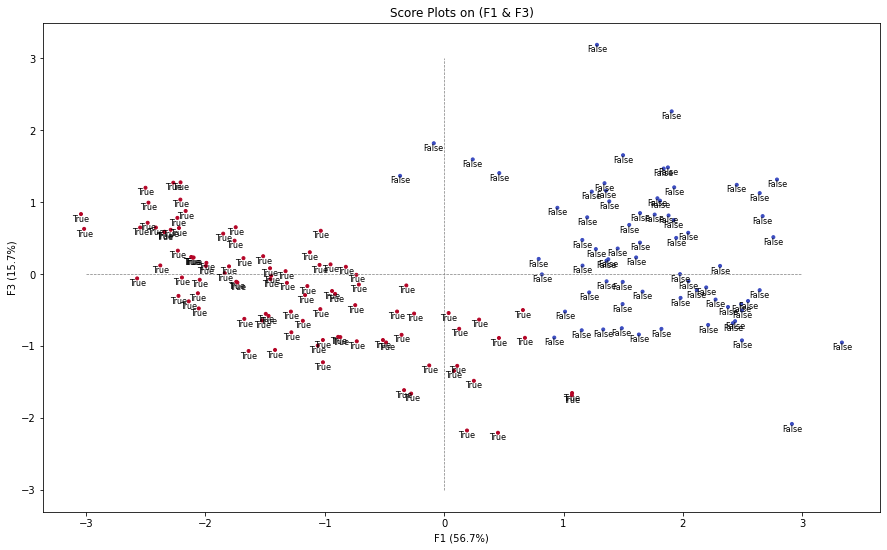

In [22]:
# Creating the score plots for the dataset without outliers: F1 vs F3
display_score_plot(X_PCA2.iloc[:,1:].values, 3, pca, [(0,2)], labels=y2, marker='.')

- Same observations than before: the separation between the 2 sets is relatively clear on the plan F1. 
- For each groups, the dots are less scattered on the plan F3 than on the plan F2.
- We can also notice that the on the "genuine" banknotes set, the cleaning step removed the outliers in the top-left quadran. 

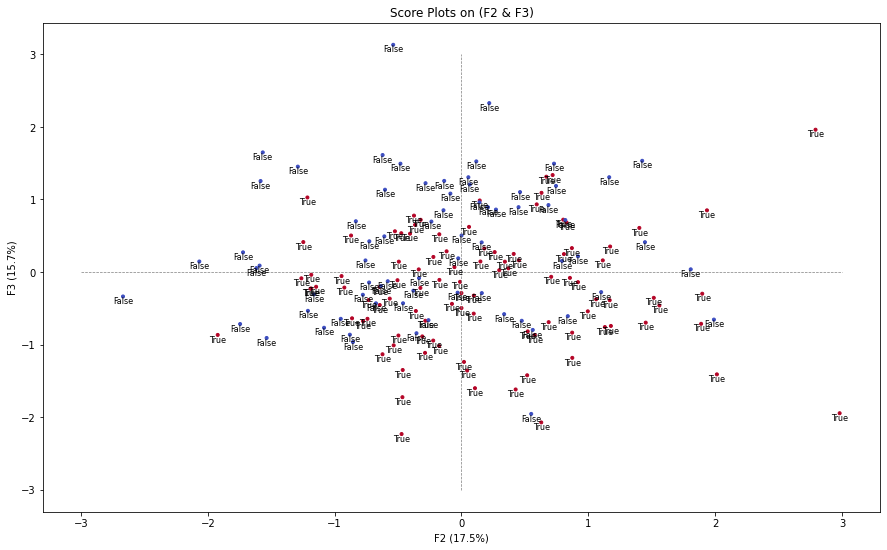

In [23]:
# Creating the score plots for the dataset with outliers: F2 vs F3
display_score_plot(X_PCA1.iloc[:,1:].values, 3, pca, [(1,2)],labels=y1, marker='.')

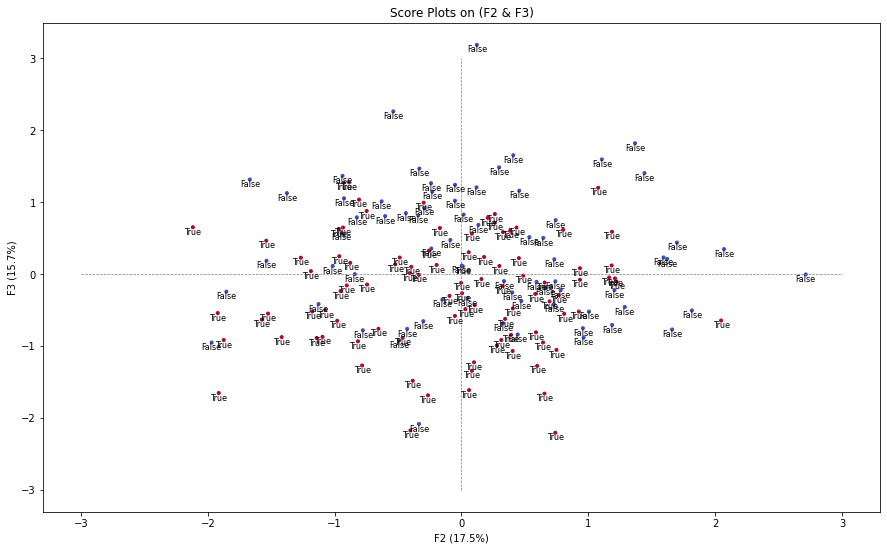

In [24]:
# Creating the score plots for the dataset without outliers: F2 vs F3
display_score_plot(X_PCA2.iloc[:,1:].values, 3, pca, [(1,2)],labels=y2, marker='.')

As expected with the scores (15.7+17.5 = 33.2% of variance explained), the last projection is not the best to visualize the 2 groups and differenciate the genuine banknotes to the fake ones. The data points are grouped around the center of the plot and mixed together. 

# Part 3 - Classification

We have selected our 3 principal components, we can now move on to the next and final part, which consists of creating a predictive model to detect the fake banknotes. We will start this work by clustering the data with Kmean to get a better understanding of how the data are structured. The clusters generated could also be used as features to improve the classification model (if necessary, based on the score).

The problem we want to solve is a binary classification. The dataset is labeled so this is a supervised problem. 
The size of the dataset is relatively small and the main focus is to be accurate (Remember: we want to detect fake banknotes).
Therefore, Logistic Regression is especially indicated for this case-study. 

This part include all the following steps:

    ✅ Explore patterns and structure with Kmean clustering
    ✅ Create a predictive model based on Logistic Regression 
    

## Clustering with Kmean

In [25]:
# Setting up Kmean: We already know that we have 2 clusters 
km = KMeans(n_clusters=2, init='k-means++',max_iter=300, n_init=10, random_state=42)

In [26]:
# Fit and predict the clusters on the dataset with outliers
km.fit(X_scaled1.iloc[:,1:].values) #we run Kmean on the original and standardized data
y1_km = km.predict(X_scaled1.iloc[:,1:].values)
X_scaled1['cluster'] = km.labels_

In [27]:
# How does it look?
X_scaled1.head()

,is_genuine,height_left,height_right,margin_low,margin_up,length,cluster
0,True,2.669454,3.096563,-0.131590,-1.189874,0.281633,0
1,True,-1.097697,-0.691254,-0.860126,-1.274740,0.780697,1
2,True,-1.030427,-0.509439,-0.303010,-1.232307,1.377405,1
3,True,-0.963156,-0.842767,-1.260106,-0.213913,1.149571,1
4,True,-1.232238,-0.539742,0.611230,-3.820725,1.062777,1


In [28]:
# Fit and predict the clusters on the dataset without outliers
km.fit(X_scaled2.iloc[:,1:].values) #we run Kmean on the original and standardized data
y2_km = km.predict(X_scaled2.iloc[:,1:].values)
X_scaled2['cluster'] = km.labels_

In [29]:
# How does it look?
X_scaled2.head()

,is_genuine,height_left,height_right,margin_low,margin_up,length,cluster
0,True,-1.098352,-0.714545,-0.860794,-1.355778,0.782776,0
1,True,-1.030121,-0.526396,-0.310560,-1.311626,1.373377,0
2,True,-0.961890,-0.871336,-1.255834,-0.251987,1.147875,0
3,True,2.006156,1.605958,-0.113041,-0.825958,0.643179,1
4,True,-1.746546,-0.400964,-0.917228,-1.223323,0.793514,0


### Structure

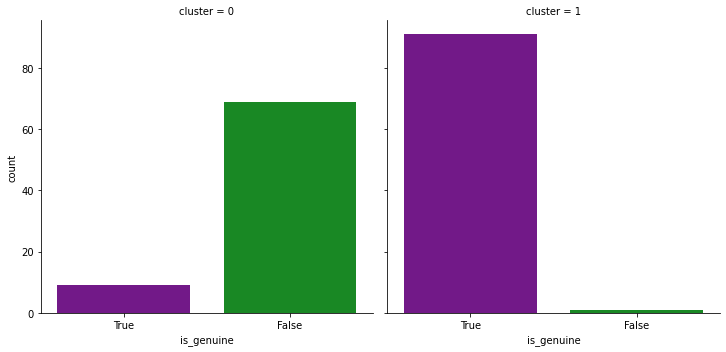

In [30]:
# Let's visualize the distribution of each categories in the clusters
sns.catplot(col='cluster', y=None, x='is_genuine', data=X_scaled1, kind='count', order=[True,False], palette=(["#7d069b","#069b15"]))

We can see that some points have been mislabelled:
- The cluster 0 is mostly compounded by fake banknotes. However, about 10 genuine banknotes have been put into this cluster.
- Reciprocally for the cluster 1, yet with a better precision as the number of data points mislabelled is very low.

Let's have a closer look of the structure of this data points and try to understand why they have been mislabelled by Kmean.

In [31]:
# Extract data from cluster 0
df = X_scaled1[X_scaled1['cluster'] == 0]
tmp = df.iloc[:,1:-1] # we remove the boolean column for the distribution plot

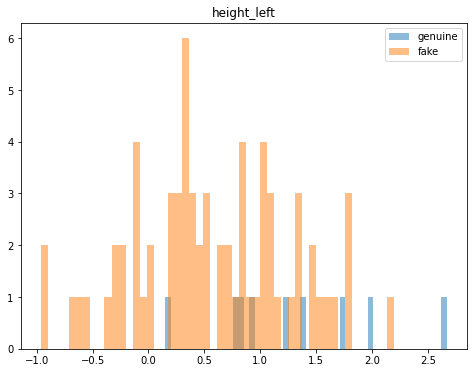

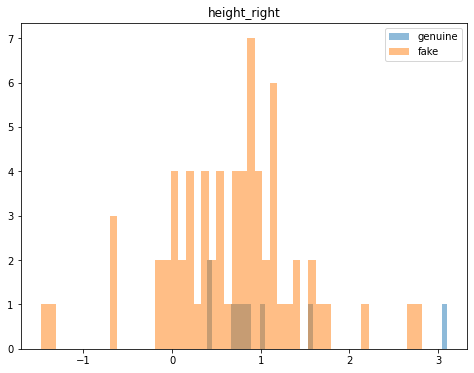

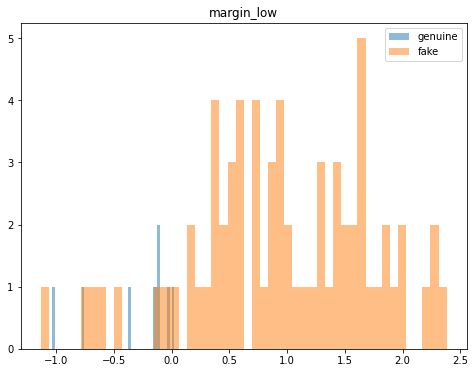

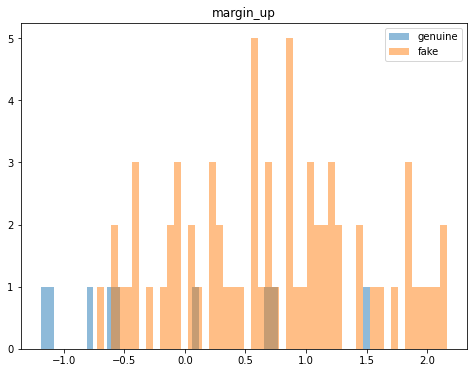

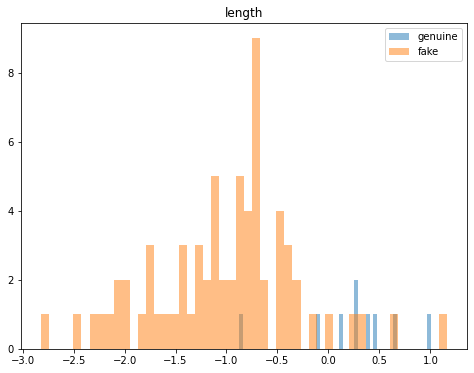

In [32]:
# Check the Distribution for each columns
for i in tmp.columns:
    plt.figure(figsize=(8,6))
    tmp1 = df[df['is_genuine'] == True]
    tmp2 = df[df['is_genuine'] == False]
    plt.hist(tmp1[i], bins=50, alpha=0.5, label="genuine")
    plt.hist(tmp2[i], bins=50, alpha=0.5, label="fake")
    plt.title(i)
    plt.legend(loc='upper right')

Why these data points have been placed into the fake group whereas they are genuine?
- The distribution of the height left and right are overlapping for the 2 categories - except one point (genuine) which is clearly at the right edge of the distribution.
- Same goes for the variable margin_up, with few points (genuine) at the left edge of the distribution.
- For the 2 others variables, the distribution of the points labelled as genuine overlap with the right tail (length) and left tail (margin_low).

In other words, these data points (genuine) have been placed into the fake group, because their height and margin_up are close to the characteristics of the fake group.
And because, among the fake group, there are some points with extreme values for the length and margin_low which make them look very similar to a genuine banknote.

In [33]:
# Extract data from cluster 1
df1 = X_scaled1[X_scaled1['cluster'] == 1]
tmp = df1.iloc[:,1:-1] # we remove the boolean column for the distribution plot

# Cluster 1 - fake banknotes mislabelled
fak1 = X_scaled1[(X_scaled1['is_genuine'] == False) & (X_scaled1['cluster'] == 1)]
len(fak1)

1

Only 1 data points have been placed into the genuine group where it was actually a fake banknote.

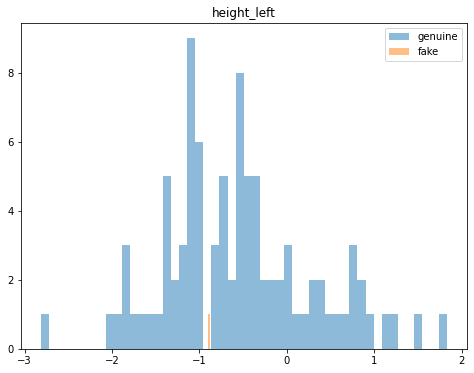

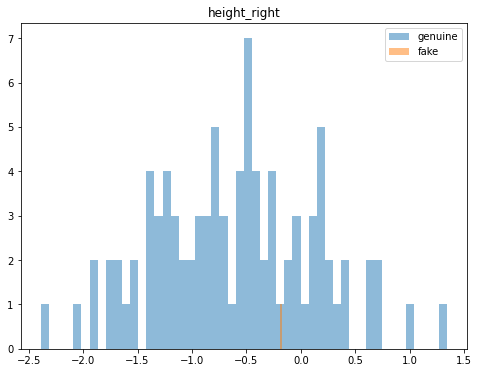

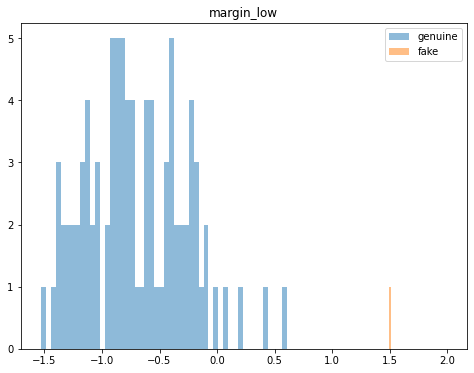

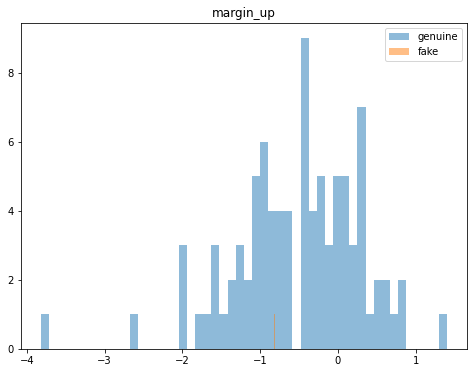

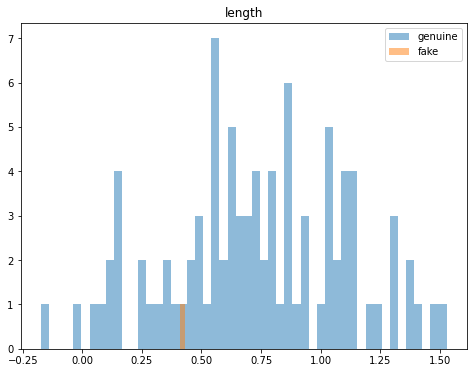

In [34]:
# Check the Distribution for each columns
for i in tmp.columns:
    plt.figure(figsize=(8,6))
    tmp1 = df1[df1['is_genuine'] == True]
    tmp2 = df1[df1['is_genuine'] == False]
    plt.hist(tmp1[i], bins=50, alpha=0.5, label="genuine")
    plt.hist(tmp2[i], bins=50, alpha=0.5, label="fake")
    plt.title(i)
    plt.legend(loc='upper right')

This data point has been mislabelled because it looks like a genuine banknote regarding to all variables - except margin_low, for which its value is clearly out of the normal distribution.


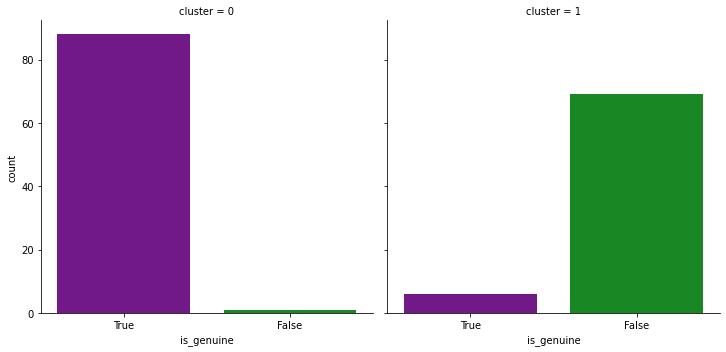

In [35]:
# Let's visualize the distribution of each categories in the clusters for the dataset without outliers
sns.catplot(col='cluster', y=None, x='is_genuine', data=X_scaled2, kind='count', order=[True,False], palette=(["#7d069b","#069b15"]))

In [36]:
X_scaled2.groupby(['cluster','is_genuine']).count()

height_left  height_right  margin_low  margin_up  length
cluster is_genuine                                                          
0       False                 1             1           1          1       1
        True                 88            88          88         88      88
1       False                69            69          69         69      69
        True                  6             6           6          6       6

We can see that the results are pretty similar on the dataset without outliers:
- 1 data point is fake but has been placed into the genuine group
- only 6 genuine data points have been misplaced into the fake group this time.

These observations make a lot of sense. As we removed from the genuine category the data points with extremes values, we removed the points which look closer to fake banknotes.
Mechanically, it makes the algorithm more accurate.

### Accuracy of Kmean

Overall, the performance of the clustering algorithm Kmean seem to be relatively good to classify the data based on its structure.
Let's evaluate properly the performance of Kmean. We will compare the result with the performance of the Logistic Regression.

In [37]:
def perf(data,x,y):
    # Get some metric to measure the accuracy    
    genuine = data[data['is_genuine'] == True]
    fake = data[data['is_genuine'] == False]
    
    tp = genuine[genuine['cluster'] == x] # True positive
    fp = fake[fake['cluster'] == x] # False positive
    fn = genuine[genuine['cluster'] == y] # False negative
    tn = fake[fake['cluster'] == y] # True negative
    
    recall = len(tp)/ (len(tp)+len(fn))
    precision = len(tp)/(len(tp)+len(fp))
    acc = (len(tp)+len(tn)) / (len(tp)+len(tn)+len(fp)+len(fn))
    
    print('recall:',recall,'precision:',precision, 'global accuracy:', acc)

In [38]:
# With outliers
perf(X_scaled1,1,0)

recall: 0.91 precision: 0.9891304347826086 global accuracy: 0.9411764705882353


In [39]:
# Without outliers
perf(X_scaled2,0,1)

recall: 0.9361702127659575 precision: 0.9887640449438202 global accuracy: 0.9573170731707317


The clustering with Kmean is relatively good to separate the data in 2 groups: fake and genuine. The global accuracy hit 94% for the dataset with outliers and 95% on the cleaned dataset. 
- The unsupervised ML is especially good in terms of precision: retrieving genuine banknotes when they are actually genuine (positive predictive value). This corroborates what we observed before on the distribution: only 1 fake banknotes where actually misplaced (precision).
- The algorithm is less good in term of sensitivity (recall) with 91% and 93% for the uncleaned and cleaned dataset respectively. This (again) corroborates what we observed before, there are more genuine data points undetected and misplaced into the fake group. 

### Visualization of clusters on scatter plots with center

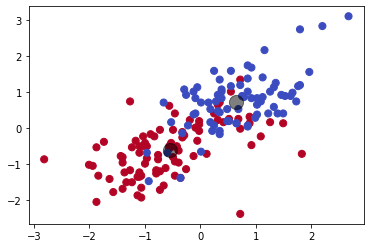

In [40]:
# Visualize the results on a scatter plot
tmp1 = np.array(X_scaled1.iloc[:,1:-1]) #extract only the values
plt.scatter(tmp1[:,0], tmp1[:,1], c=y1_km, s=50, cmap='coolwarm') #plot the first 2 features

# Visualize the center of each cluster
centers1 = km.cluster_centers_ 
plt.scatter(centers1[:, 0], centers1[:, 1], c='black', s=200, alpha=0.5);

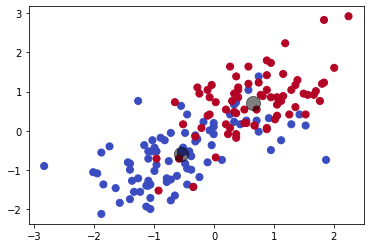

In [41]:
# Visualize the results
tmp2 = np.array(X_scaled2.iloc[:,1:-1])
plt.scatter(tmp2[:, 0], tmp2[:, 1], c=y2_km, s=50, cmap='coolwarm')

# Visualize the centroids
centers2 = km.cluster_centers_
plt.scatter(centers2[:, 0], centers2[:, 1], c='black', s=200, alpha=0.5);

### Visualization of clusters on Scores plots

In [42]:
# Add clusters into the PCA scores table
clus1 = X_scaled1.iloc[:,-1]
X_PCA1 = X_PCA1.join(clus1)

clus2 = X_scaled2.iloc[:,-1]
X_PCA2 = X_PCA2.join(clus2)

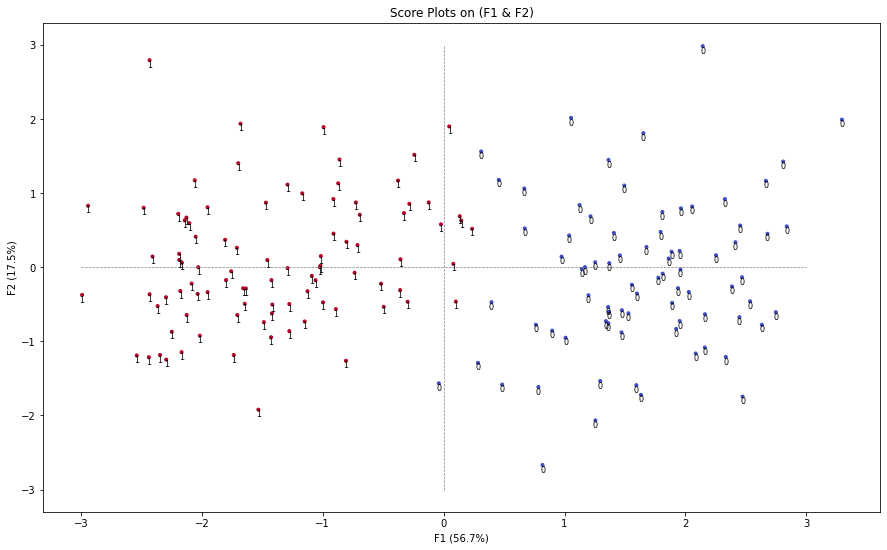

In [43]:
# Visualizing the clusters found with Kmean on the scores plot (plans F1 & F2)
display_score_plot(X_PCA1.iloc[:,1:].values, 3, pca, [(0,1)], labels=X_PCA1['cluster'], marker='.') #dataset with outliers

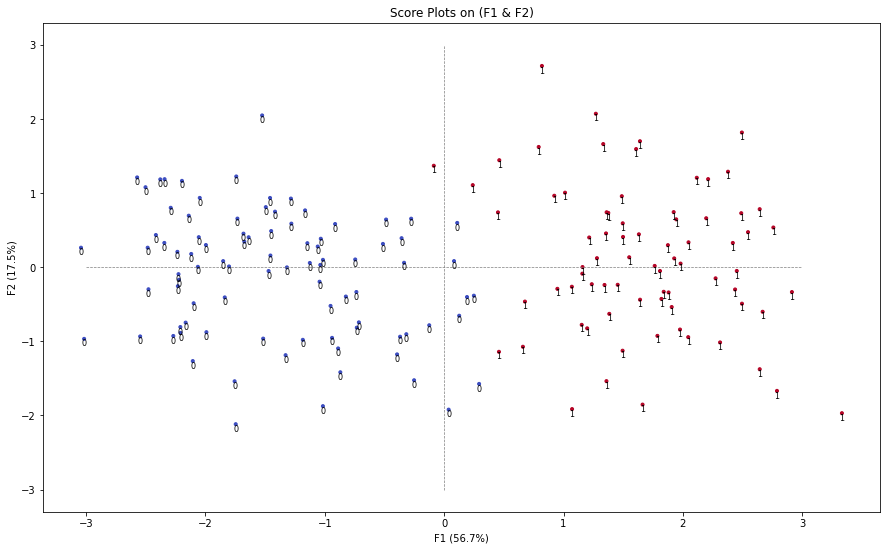

In [44]:
# Visualizing the clusters found with Kmean on the scores plot (plans F1 & F2)
display_score_plot(X_PCA2.iloc[:,1:].values, 3, pca, [(0,1)], labels=X_PCA2['cluster'], marker='.') #dataset without outliers

- We can see that the two clusters are well separated on the plan F1 vs F2.
- Some points have extreme values (above the 0 on the x-axis) and are actually closer to the other group. The question is, are they in the right cluster according to their label?

Let's do the same plot but with the real label vs the clusters found by kmean to illustrate the performances.

In [45]:
# Modify the function so we can see the real label and the color is based on the cluster found by Kmean
def display_score_plot2(df, n_comp, pca, axis_ranks,cluster,labels=None, alpha=1,marker=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
    
            fig, ax = plt.subplots(figsize=(15,9))
        
            # Plot
            ax.scatter(x=df[:, d1], y=df[:, d2],alpha=alpha, marker=marker,c=cluster,cmap='coolwarm') 
            
            # Labels
            for i,(x,y) in enumerate(df[:,[d1,d2]]):
                plt.text(x, y, labels[i],fontsize='8', ha='center',va='top', color='black')

            
            # axis names with %explained variance
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))
        
            # Lines
            plt.plot([-3, 3], [0, 0], color='grey', linewidth= 0.7,ls='--')
            plt.plot([0, 0], [-3, 3], color='grey', linewidth= 0.7,ls='--')

            # Title
            plt.title("Score Plots on (F{} & F{})".format(d1+1, d2+1))
            plt.show(block=False)

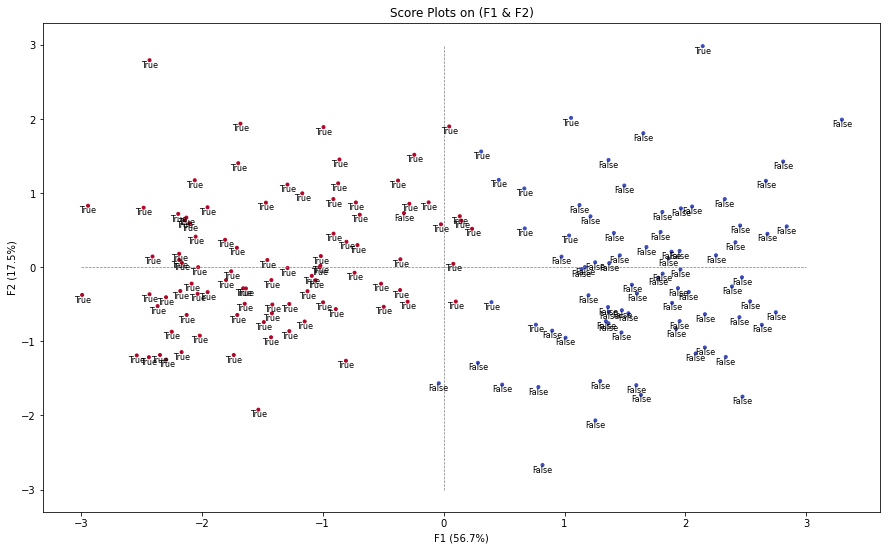

In [46]:
# Creating the score plots for the dataset with outliers: F1 vs F2
display_score_plot2(X_PCA1.iloc[:,1:].values, 3, pca, [(0,1)], labels=y1, cluster= X_PCA1['cluster'],marker='.')

This visualization is interesting to represent the accuracy of the result from Kmean. 
- The genuine banknotes are normally in red.
- We can see that some of them, at the edge of the 2 groups and in the top right corner are in blue, so in the wrong cluster.  
    - This can be explained by a lack of sensitivity of the ML algorithm (for the ones at the border of the 2 groups)
    - or by abnormal values for the data point at the top right corner.

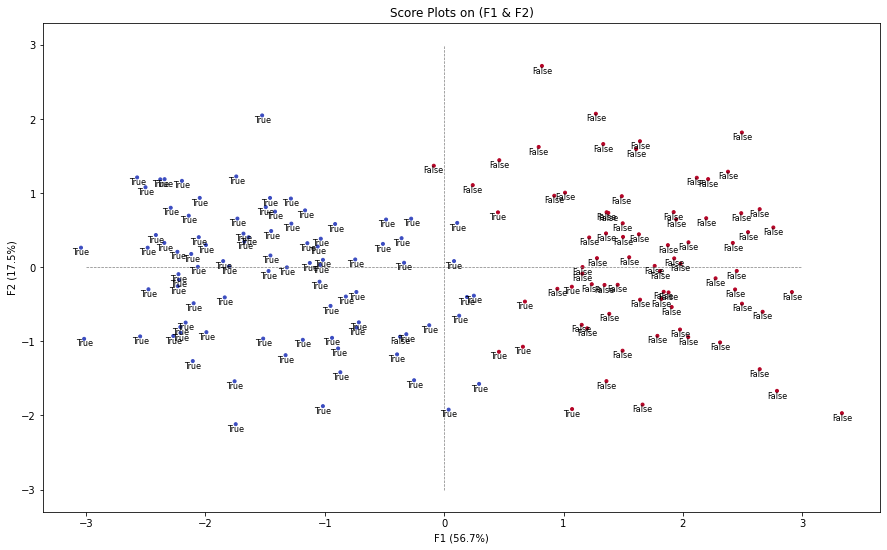

In [47]:
# Creating the score plots for the dataset with outliers: F1 vs F2
display_score_plot2(X_PCA2.iloc[:,1:].values, 3, pca, [(0,1)], labels=y2, cluster= X_PCA2['cluster'],marker='.')

We can actually see the impact of the cleaning on the results of Kmean. By removing 4 abnormal values from the dataset we also remove 4 mislabelled data points.

## Logistic Regression

Last step of this project: creating a predictive model based on Logistic Regression to classify the banknotes and detect the fake ones.

### Preprocessing

In [48]:
# Split between features and labels
# With outliers
features1 = X_PCA1.iloc[:,1:4] #keeping only the 3 first PCs
labels1 =  X_PCA1['is_genuine']

# Without outliers
features2 = X_PCA2.iloc[:,1:4]
labels2 =  X_PCA2['is_genuine']

In [70]:
# Split between train and test set
    # We apply a ratio 80:20
    # We stratify based on column is_genuine to keep the proportion of fake and genuine banknotes in both sets
    
X1_train, X1_test, y1_train, y1_test = train_test_split(features1,labels1,stratify= labels1,test_size=0.2) 
X2_train, X2_test, y2_train, y2_test = train_test_split(features2,labels2,stratify= labels2,test_size=0.2) 

In [71]:
# Quick check on the structure
print(X1_train.shape, X1_test.shape, y1_train.shape, y1_test.shape)
print(X2_train.shape, X2_test.shape, y2_train.shape, y2_test.shape)

(136, 3) (34, 3) (136,) (34,)
(131, 3) (33, 3) (131,) (33,)


### Apply

In [76]:
# Train the model
model = LogisticRegression(random_state=42)
lgr1 = model.fit(X1_train, y1_train)
lgr2 = model.fit(X2_train, y2_train)

In [73]:
# Make predictions
y1_pred = lgr1.predict(X1_test)
y2_pred = lgr2.predict(X2_test)

In [74]:
# Collect the predictions and probabilities associated into a dataframe
results = X1_test.copy()
results['proba_Fake'] = lgr1.predict_proba(X1_test)[:,0]
results['proba_Genuine'] = lgr1.predict_proba(X1_test)[:,1]
results['predict_is_genuine'] = lgr1.predict(X1_test)
results.head()

,PC1,PC2,PC3,proba_Fake,proba_Genuine,predict_is_genuine
83,-0.517601,-0.222694,-0.945456,0.027053,0.972947,True
112,2.838282,0.550182,-1.956672,0.981701,0.018299,False
95,-1.291945,1.114480,0.160322,0.050285,0.949715,True
85,-1.015935,0.149510,0.145113,0.054065,0.945935,True
164,1.408127,0.461999,1.102349,0.994496,0.005504,False


### Performances

While there are many ways of measuring model performance (precision, recall, F1 Score, ROC Curve, etc), we are going to keep this simple and use the accuracy and the confusion matrix (comparable to what we did before with Kmean).

In [75]:
# Use score method to get accuracy of model
score1 = lgr1.score(X1_test, y1_test)
score2 = lgr2.score(X2_test, y2_test)
print(score1, score2)

0.9705882352941176 1.0


- The accuracy is 94% on the dataset with outliers and 100% when we clean the data. Removing the outliers had a positive impact on the accuracy of the model. 
- The performances of the Logistic Regression model are higher than the performances observed with Kmean when the dataset is clean. 

In [55]:
# Confusion matrix
cm = metrics.confusion_matrix(y1_test, y1_pred)
print(cm)

[[12  2]
 [ 0 20]]


In [56]:
# Zoom-in the 2 False Positive
# Extract the test and predictions values
test = pd.Series(y1_test.reset_index().iloc[:,1],name='test')
pred = pd.Series(y1_pred,name='predictions')

# Create a dataframe with the informations
tmp = pd.concat([test, pred], axis=1)

# Select the rows when the 2 columns are not matched
tmp[tmp['test'] != tmp['predictions']]

,test,predictions
0,False,True
12,False,True


In [57]:
# Confusion matrix
cm = metrics.confusion_matrix(y2_test, y2_pred)
print(cm)

[[14  0]
 [ 0 19]]


Removing the outliers improve the precision of the model:
- in the dataset with outliers, 2 fake banknotes have been placed into the genuine set (False positive)
- when we remove the outliers, we increase the precision and selectivity of the model.

### Wrap

Here we wrap all the steps together:
- Reading the data
- Standardization
- PCA
- Predictions by the trained model
- Extracting the results and probabilities associated

In [58]:
def fake_detector(dataset,idxcol):
    
    #Read the data
    df = pd.read_csv(Path.cwd()/dataset)
    df = df.set_index(idxcol) # set id as index
    df.drop('diagonal', inplace=True, axis=1) # Drop the variable diagonal 

    #Standardization
    mask = df.columns
    df[mask] = StandardScaler().fit_transform(df[mask])
    
    # Extract features
    features = df.columns
    
    # Reduce dimension with PCA
    pca = PCA()
    name = ['PC1','PC2','PC3','PC4','PC5']
    df_PCA = df.reset_index()[['id']]
    df_PCA[name] = pd.DataFrame(pca.fit_transform(df.values),columns=[name])
    
    # Make predictions
    pred = lgr2.predict(df_PCA.iloc[:,1:4])
    
    # Collect Results
    results = df_PCA.iloc[:,0:4].copy()
    results['proba_Fake'] = lgr2.predict_proba(df_PCA.iloc[:,1:4])[:,0]
    results['proba_Genuine'] = lgr2.predict_proba(df_PCA.iloc[:,1:4])[:,1]
    results['predict_is_genuine'] = lgr2.predict(df_PCA.iloc[:,1:4])
    
    return results

In [59]:
# We test the function on a new set
fake_detector('example.csv','id')

,id,PC1,PC2,PC3,proba_Fake,proba_Genuine,predict_is_genuine
0,A_1,-0.583009,-1.639437,-0.031542,0.045142,0.954858,True
1,A_2,-1.319672,-0.137765,0.971450,0.085070,0.914930,True
2,A_3,-1.786844,0.527895,-0.901732,0.001552,0.998448,True
3,A_4,1.073280,2.244274,0.160579,0.974801,0.025199,False
4,A_5,2.616244,-0.994968,-0.198756,0.994599,0.005401,False
